# Simulation 7

**Mengqi Liu**

**Oct 9， 2023**

In [1]:
import numpy as np
import utils
import linear
import pandas as pd
import scipy
import math
import scipy
import matplotlib.pyplot as plt
from itertools import permutations
import random
import seaborn as sns
import linear2

TO-DO:
1. Correction for identification problem
2. What is the learned graph? - continuous and discrete
3. formalize for logistic scenarios (Tue)
4. Use SGLD for solving DAGMA (add some randomness)


- correction

- Frobenious norm of learned graphs:

  - NOTEARS + continuous 5050(n) + 5051(u)
  - DAGMA + continuous 5052(n) + 5053(u)
  - NOTEARS + discrete 5055(log) + 5056(poi)
  - DAGMA + discrete 5057^

- SGLD

  - NOTEARS + continuous 6000+
  - DAGMA + continuous 5070(n) + 5071(u)
  - NOTEARS + discrete 6000+
  - DAGMA + discrete 5072^

## Continuous case:

1. constant variance

notears 6004 & notears+sgld 6000
DAGMA 6002 & DAGMA+sgld 6003

notears+sgld normal 6005

In [ ]:
semtypes = ["gauss"] * 2
ds = [5, 10, 15, 20, 30, 40]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
colormap = plt.cm.tab10
loss_f = ["loss_true", "loss_est", "loss_min_perm", "loss_max_perm"]
seeds = [5050, 6000]
dists = ["Gaussian"] * 2 
methods = ["NOTEARS", "NOTEARS + SGLD"]
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t"]
#losses = ["h", "h_2", "h_t"]

for loss_, s in zip(methods, range(2)):
    for val_, i, ii in zip(["l2 loss", "fro dist"], [0, 5], range(2)):
        result_d = np.zeros([len(ds), len(loss_f)+100])
        for j, d in enumerate(ds):
            result = pd.read_csv("./results_loss3/result_"+str(seeds[s])+"_"+semtypes[s]+"_"+str(d)+".csv")
            result_d[j, :2] = result.iloc[:2, i]
            min_ind = np.argmin(result.iloc[1:, i]) + 1
            result_d[j, 2] = result.iloc[min_ind, i]
            max_ind = np.argmax(result.iloc[1:, i]) + 1
            result_d[j, 3] = result.iloc[max_ind, i]
            for k in range(100):
                result_d[j, k+4] = result.iloc[k+2, i]

        ax = axs[s, ii]
        for p in range(4):
            if p >0:
                if p ==1:
                    ax.plot(ds, result_d[:,p], marker='.', label=loss_f[p], color=colormap(p), linewidth=2.5)
                else:
                    ax.plot(ds, result_d[:,p], marker='.', label=loss_f[p], color=colormap(p))
        for p in range(100):
            ax.plot(ds, result_d[:,p+4], marker='', alpha=0.1, color=colormap(4))
        ax.set_xlabel('d')
        ax.set_ylabel(val_)
        ax.set_title(f'sem_type=gauss, method={loss_}')
        ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.savefig("./results_loss3/loss_sgld_no_gauss.png")
plt.suptitle
plt.show()


2. nonconstant variance

### Notears

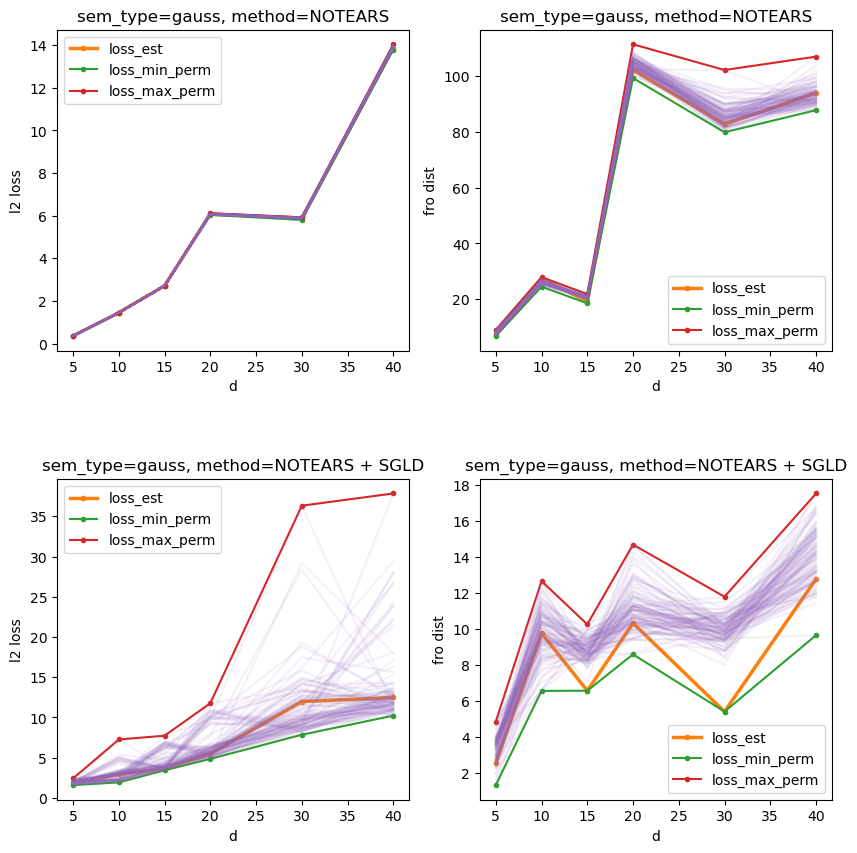

In [7]:
semtypes = ["gauss"] * 2
ds = [5, 10, 15, 20, 30, 40]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
colormap = plt.cm.tab10
loss_f = ["loss_true", "loss_est", "loss_min_perm", "loss_max_perm"]
seeds = [5050, 6000]
dists = ["Gaussian"] * 2 
methods = ["NOTEARS", "NOTEARS + SGLD"]
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t"]
#losses = ["h", "h_2", "h_t"]

for loss_, s in zip(methods, range(2)):
    for val_, i, ii in zip(["l2 loss", "fro dist"], [0, 5], range(2)):
        result_d = np.zeros([len(ds), len(loss_f)+100])
        for j, d in enumerate(ds):
            result = pd.read_csv("./results_loss3/result_"+str(seeds[s])+"_"+semtypes[s]+"_"+str(d)+".csv")
            result_d[j, :2] = result.iloc[:2, i]
            min_ind = np.argmin(result.iloc[1:, i]) + 1
            result_d[j, 2] = result.iloc[min_ind, i]
            max_ind = np.argmax(result.iloc[1:, i]) + 1
            result_d[j, 3] = result.iloc[max_ind, i]
            for k in range(100):
                result_d[j, k+4] = result.iloc[k+2, i]

        ax = axs[s, ii]
        for p in range(4):
            if p >0:
                if p ==1:
                    ax.plot(ds, result_d[:,p], marker='.', label=loss_f[p], color=colormap(p), linewidth=2.5)
                else:
                    ax.plot(ds, result_d[:,p], marker='.', label=loss_f[p], color=colormap(p))
        for p in range(100):
            ax.plot(ds, result_d[:,p+4], marker='', alpha=0.1, color=colormap(4))
        ax.set_xlabel('d')
        ax.set_ylabel(val_)
        ax.set_title(f'sem_type=gauss, method={loss_}')
        ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.savefig("./results_loss3/loss_sgld_no_gauss.png")
plt.suptitle
plt.show()

### DAGMA

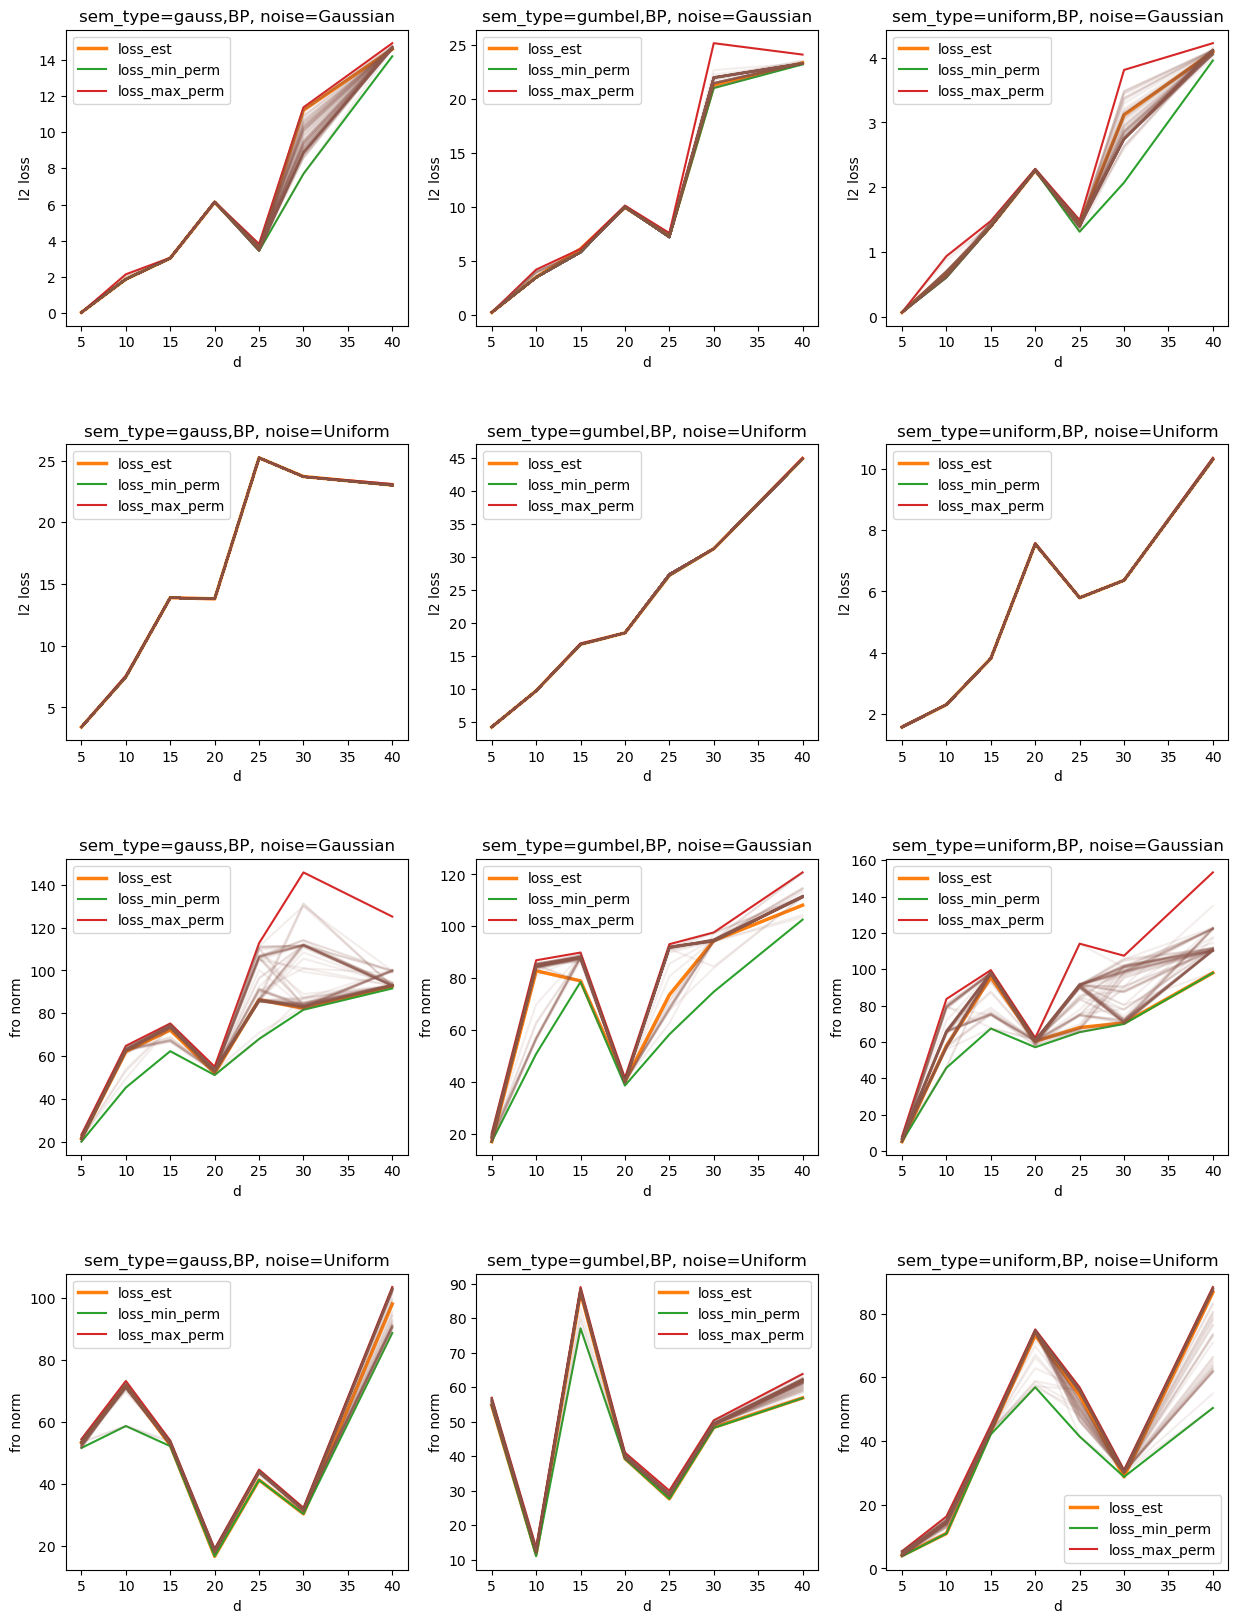

In [44]:
semtypes = ["gauss", "gumbel", "uniform"]
ds = [5, 10, 15, 20, 25, 30, 40]
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
colormap = plt.cm.tab10
loss_f = ["loss_true", "loss_est", "loss_min_perm", "loss_max_perm"]
graphtypes = ["BP", "BP"] 
dists = ["Gaussian", "Uniform"] 
seeds = [5052, 5053]
for graph_type, dist, s in zip(graphtypes, dists, range(len(dists))):
    for i, sem_type in enumerate(semtypes):
        result_d = np.zeros([len(ds), len(loss_f)+100])
        for j, d in enumerate(ds):
            result = pd.read_csv("./results_loss3/result_"+str(seeds[s])+"_"+sem_type+"_"+str(d)+".csv")
            result_d[j, :2] = result.iloc[:2, 0]
            min_ind = np.argmin(result.iloc[1:, 0]) + 1
            result_d[j, 2] = result.iloc[min_ind, 0]
            max_ind = np.argmax(result.iloc[1:, 0]) + 1
            result_d[j, 3] = result.iloc[max_ind, 0]
            for k in range(100):
                result_d[j, k+4] = result.iloc[k+2, 0]

        ax = axs[s, i]
        for p in range(4):
            if p >0:
                if p ==1:
                    ax.plot(ds, result_d[:,p], marker='', label=loss_f[p], color=colormap(p), linewidth=2.5)
                else:
                    ax.plot(ds, result_d[:,p], marker='', label=loss_f[p], color=colormap(p))
        for p in range(100):
            ax.plot(ds, result_d[:,p+4], marker='', alpha=0.1, color=colormap(5))
        ax.set_xlabel('d')
        ax.set_ylabel("l2 loss")
        ax.set_title((f'sem_type={sem_type},{graph_type}, noise={dist}'))
        ax.legend()
for graph_type, dist, s in zip(graphtypes, dists, range(len(dists))):
    for i, sem_type in enumerate(semtypes):
        result_d = np.zeros([len(ds), len(loss_f)+100])
        for j, d in enumerate(ds):
            result = pd.read_csv("./results_loss3/result_"+str(seeds[s])+"_"+sem_type+"_"+str(d)+".csv")
            result_d[j, :2] = result.iloc[:2, 1]
            min_ind = np.argmin(result.iloc[1:, 1]) + 1
            result_d[j, 2] = result.iloc[min_ind, 1]
            max_ind = np.argmax(result.iloc[1:, 1]) + 1
            result_d[j, 3] = result.iloc[max_ind, 1]
            for k in range(100):
                result_d[j, k+4] = result.iloc[k+2, 1]

        ax = axs[s+2, i]
        for p in range(4):
            if p >0:
                if p ==1:
                    ax.plot(ds, result_d[:,p], marker='', label=loss_f[p], color=colormap(p), linewidth=2.5)
                else:
                    ax.plot(ds, result_d[:,p], marker='', label=loss_f[p], color=colormap(p))
        for p in range(100):
            ax.plot(ds, result_d[:,p+4], marker='', alpha=0.1, color=colormap(5))
        ax.set_xlabel('d')
        ax.set_ylabel("fro norm")
        ax.set_title((f'sem_type={sem_type},{graph_type}, noise={dist}'))
        ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.savefig("./results_loss3/loss_dag_c.png")
plt.suptitle
plt.show()

### DAGMA + noise

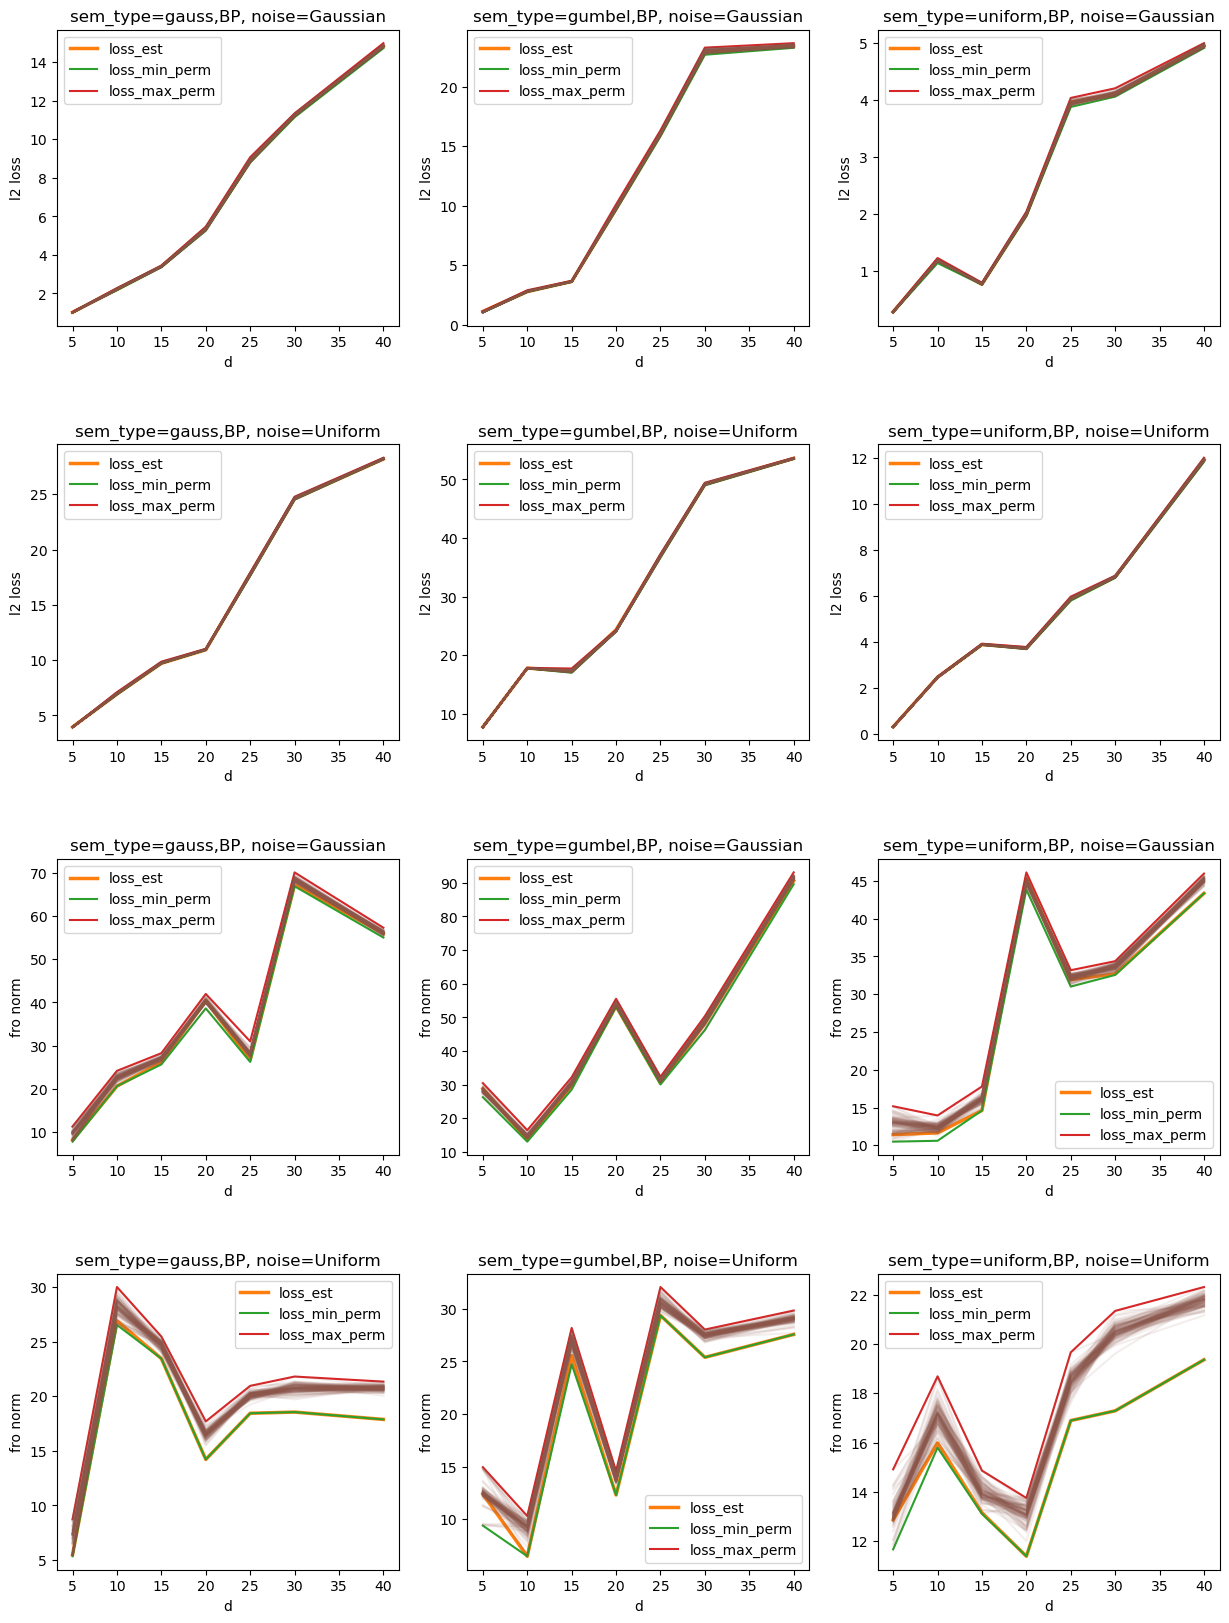

In [45]:
semtypes = ["gauss", "gumbel", "uniform"]
ds = [5, 10, 15, 20, 25, 30, 40]
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
colormap = plt.cm.tab10
loss_f = ["loss_true", "loss_est", "loss_min_perm", "loss_max_perm"]
graphtypes = ["BP", "BP"] 
dists = ["Gaussian", "Uniform"] 
seeds = [5070, 5071]
for graph_type, dist, s in zip(graphtypes, dists, range(len(dists))):
    for i, sem_type in enumerate(semtypes):
        result_d = np.zeros([len(ds), len(loss_f)+100])
        for j, d in enumerate(ds):
            result = pd.read_csv("./results_loss3/result_"+str(seeds[s])+"_"+sem_type+"_"+str(d)+".csv")
            result_d[j, :2] = result.iloc[:2, 0]
            min_ind = np.argmin(result.iloc[1:, 0]) + 1
            result_d[j, 2] = result.iloc[min_ind, 0]
            max_ind = np.argmax(result.iloc[1:, 0]) + 1
            result_d[j, 3] = result.iloc[max_ind, 0]
            for k in range(100):
                result_d[j, k+4] = result.iloc[k+2, 0]

        ax = axs[s, i]
        for p in range(4):
            if p >0:
                if p ==1:
                    ax.plot(ds, result_d[:,p], marker='', label=loss_f[p], color=colormap(p), linewidth=2.5)
                else:
                    ax.plot(ds, result_d[:,p], marker='', label=loss_f[p], color=colormap(p))
        for p in range(100):
            ax.plot(ds, result_d[:,p+4], marker='', alpha=0.1, color=colormap(5))
        ax.set_xlabel('d')
        ax.set_ylabel("l2 loss")
        ax.set_title((f'sem_type={sem_type},{graph_type}, noise={dist}'))
        ax.legend()
for graph_type, dist, s in zip(graphtypes, dists, range(len(dists))):
    for i, sem_type in enumerate(semtypes):
        result_d = np.zeros([len(ds), len(loss_f)+100])
        for j, d in enumerate(ds):
            result = pd.read_csv("./results_loss3/result_"+str(seeds[s])+"_"+sem_type+"_"+str(d)+".csv")
            result_d[j, :2] = result.iloc[:2, 1]
            min_ind = np.argmin(result.iloc[1:, 1]) + 1
            result_d[j, 2] = result.iloc[min_ind, 1]
            max_ind = np.argmax(result.iloc[1:, 1]) + 1
            result_d[j, 3] = result.iloc[max_ind, 1]
            for k in range(100):
                result_d[j, k+4] = result.iloc[k+2, 1]

        ax = axs[s+2, i]
        for p in range(4):
            if p >0:
                if p ==1:
                    ax.plot(ds, result_d[:,p], marker='', label=loss_f[p], color=colormap(p), linewidth=2.5)
                else:
                    ax.plot(ds, result_d[:,p], marker='', label=loss_f[p], color=colormap(p))
        for p in range(100):
            ax.plot(ds, result_d[:,p+4], marker='', alpha=0.1, color=colormap(5))
        ax.set_xlabel('d')
        ax.set_ylabel("fro norm")
        ax.set_title((f'sem_type={sem_type},{graph_type}, noise={dist}'))
        ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.savefig("./results_loss3/loss_sgld_dag_c.png")
plt.suptitle
plt.show()

## Discrete case:

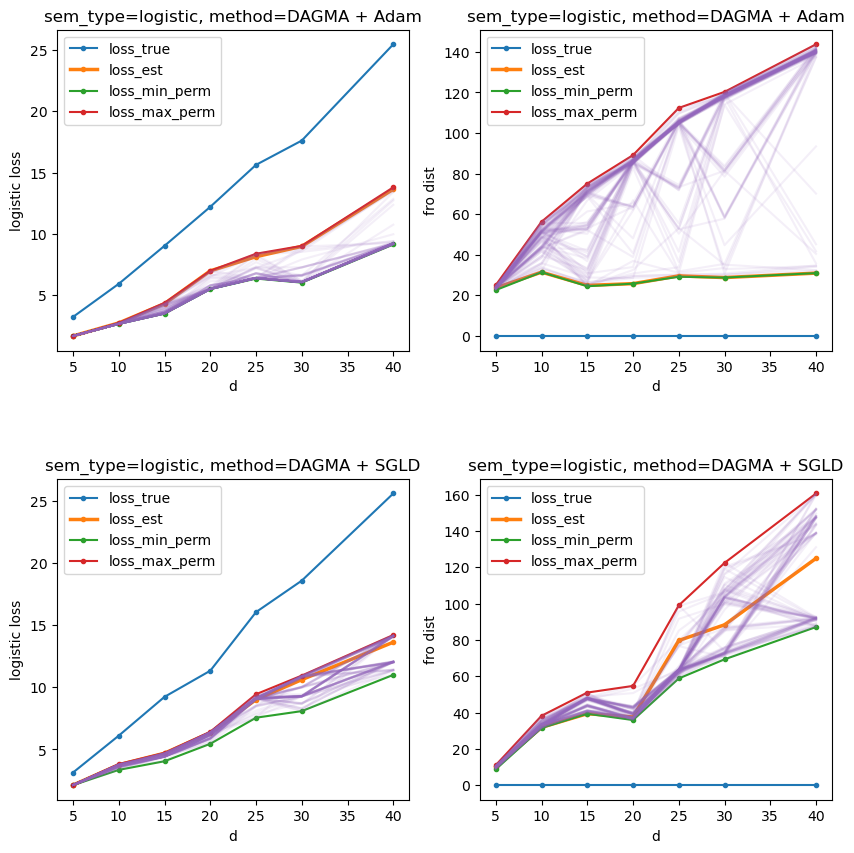

In [48]:
semtypes = ["logistic"] * 2
ds = [5, 10, 15, 20, 25, 30, 40]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
colormap = plt.cm.tab10
loss_f = ["loss_true", "loss_est", "loss_min_perm", "loss_max_perm"]
seeds = [5057, 5072]
losses = ["logistic", "logistic"]
methods = ["DAGMA + Adam", "DAGMA + SGLD"]
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t"]
#losses = ["h", "h_2", "h_t"]

for loss_, s in zip(methods, range(2)):
    for val_, i, ii in zip(["logistic loss", "fro dist"], [0, 1], range(2)):
        result_d = np.zeros([len(ds), len(loss_f)+100])
        for j, d in enumerate(ds):
            result = pd.read_csv("./results_loss3/result_"+str(seeds[s])+"_"+semtypes[s]+"_"+str(d)+".csv")
            result_d[j, :2] = result.iloc[:2, i]
            min_ind = np.argmin(result.iloc[1:, i]) + 1
            result_d[j, 2] = result.iloc[min_ind, i]
            max_ind = np.argmax(result.iloc[1:, i]) + 1
            result_d[j, 3] = result.iloc[max_ind, i]
            for k in range(100):
                result_d[j, k+4] = result.iloc[k+2, i]

        ax = axs[s, ii]
        for p in range(4):
            if p >-1:
                if p ==1:
                    ax.plot(ds, result_d[:,p], marker='.', label=loss_f[p], color=colormap(p), linewidth=2.5)
                else:
                    ax.plot(ds, result_d[:,p], marker='.', label=loss_f[p], color=colormap(p))
        for p in range(100):
            ax.plot(ds, result_d[:,p+4], marker='', alpha=0.1, color=colormap(4))
        ax.set_xlabel('d')
        ax.set_ylabel(val_)
        ax.set_title(f'sem_type=logistic, method={loss_}')
        ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.savefig("./results_loss3/loss_dag_log.png")
plt.suptitle
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './results_loss3/result_6000_logistic_5.csv'

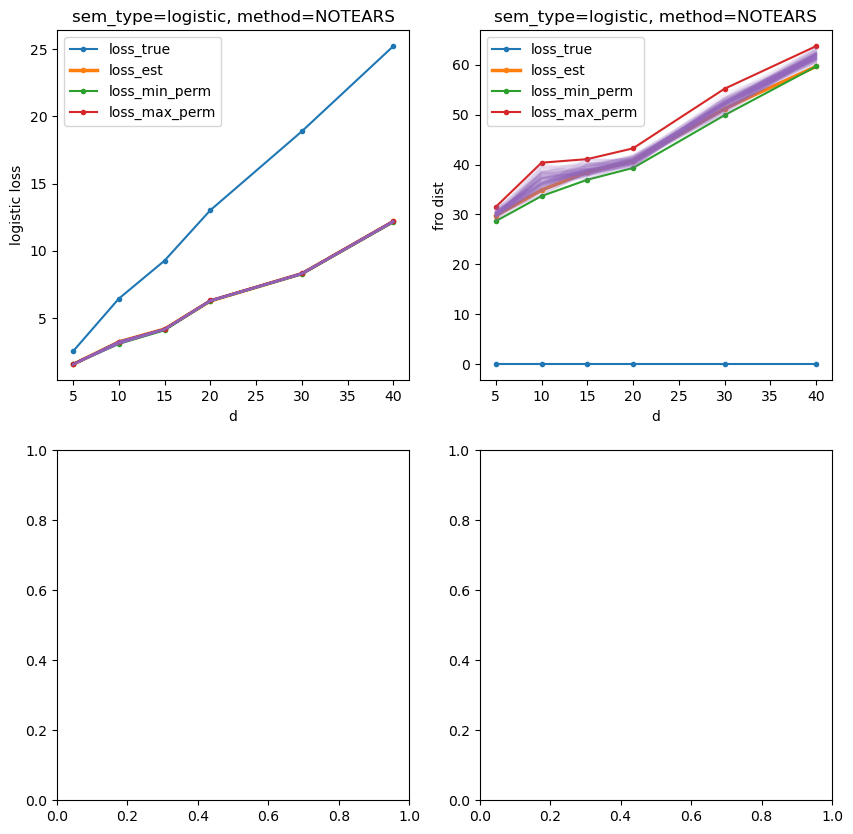

In [37]:
semtypes = ["logistic"] * 2
ds = [5, 10, 15, 20, 30, 40]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
colormap = plt.cm.tab10
loss_f = ["loss_true", "loss_est", "loss_min_perm", "loss_max_perm"]
seeds = [5055, 6000]
dists = ["Gaussian"] * 2 
methods = ["NOTEARS", "NOTEARS + SGLD"]
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t"]
#losses = ["h", "h_2", "h_t"]

for loss_, s in zip(methods, range(2)):
    for val_, i, ii in zip(["logistic loss", "fro dist"], [0, 5], range(2)):
        result_d = np.zeros([len(ds), len(loss_f)+100])
        for j, d in enumerate(ds):
            result = pd.read_csv("./results_loss3/result_"+str(seeds[s])+"_"+semtypes[s]+"_"+str(d)+".csv")
            result_d[j, :2] = result.iloc[:2, i]
            min_ind = np.argmin(result.iloc[1:, i]) + 1
            result_d[j, 2] = result.iloc[min_ind, i]
            max_ind = np.argmax(result.iloc[1:, i]) + 1
            result_d[j, 3] = result.iloc[max_ind, i]
            for k in range(100):
                result_d[j, k+4] = result.iloc[k+2, i]

        ax = axs[s, ii]
        for p in range(4):
            if p >-0:
                if p ==1:
                    ax.plot(ds, result_d[:,p], marker='.', label=loss_f[p], color=colormap(p), linewidth=2.5)
                else:
                    ax.plot(ds, result_d[:,p], marker='.', label=loss_f[p], color=colormap(p))
        for p in range(100):
            ax.plot(ds, result_d[:,p+4], marker='', alpha=0.1, color=colormap(4))
        ax.set_xlabel('d')
        ax.set_ylabel(val_)
        ax.set_title(f'sem_type=logistic, method={loss_}')
        ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
#plt.savefig("./results_loss3/loss_no_log.png")
plt.suptitle
plt.show()